# Seaborn Data Visualization

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload

## Import data

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

## Plots

<Axes: xlabel='not_distracted', ylabel='Count'>

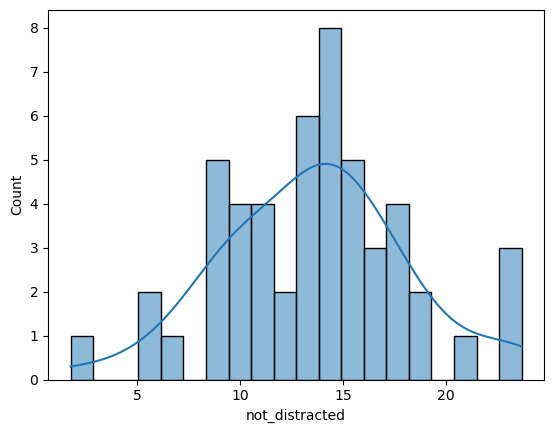

In [16]:
# Distribution plot
sns.histplot(crash_df['not_distracted'], kde =True, bins=20)

'\n    kind : type of plot \n        \'reg\' : regression\n        \'kde\' : kernal density estimate\n        "scatter": scatter plot\n        "hist": histogram plot\n        "hex" : hexgonal plot\n        "resid" : residual plot\n'

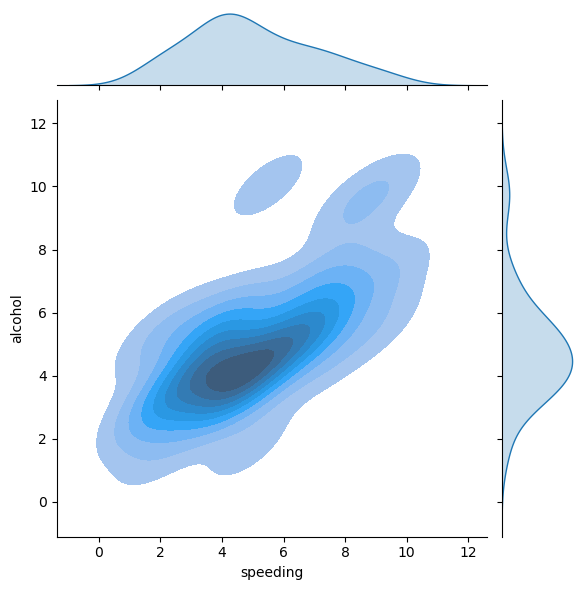

In [24]:
# Joint plot
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde', fill=True)
"""
    kind : type of plot 
        'reg' : regression
        'kde' : kernal density estimate
        "scatter": scatter plot
        "hist": histogram plot
        "hex" : hexgonal plot
        "resid" : residual plot
"""

<Axes: xlabel='alcohol', ylabel='Density'>

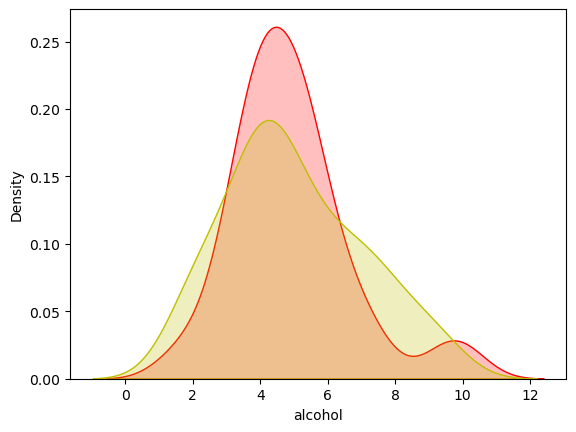

In [36]:
# KDE plot

sns.kdeplot(crash_df["alcohol"], fill=True, color='r')
sns.kdeplot(crash_df['speeding'], fill=True, color='y')

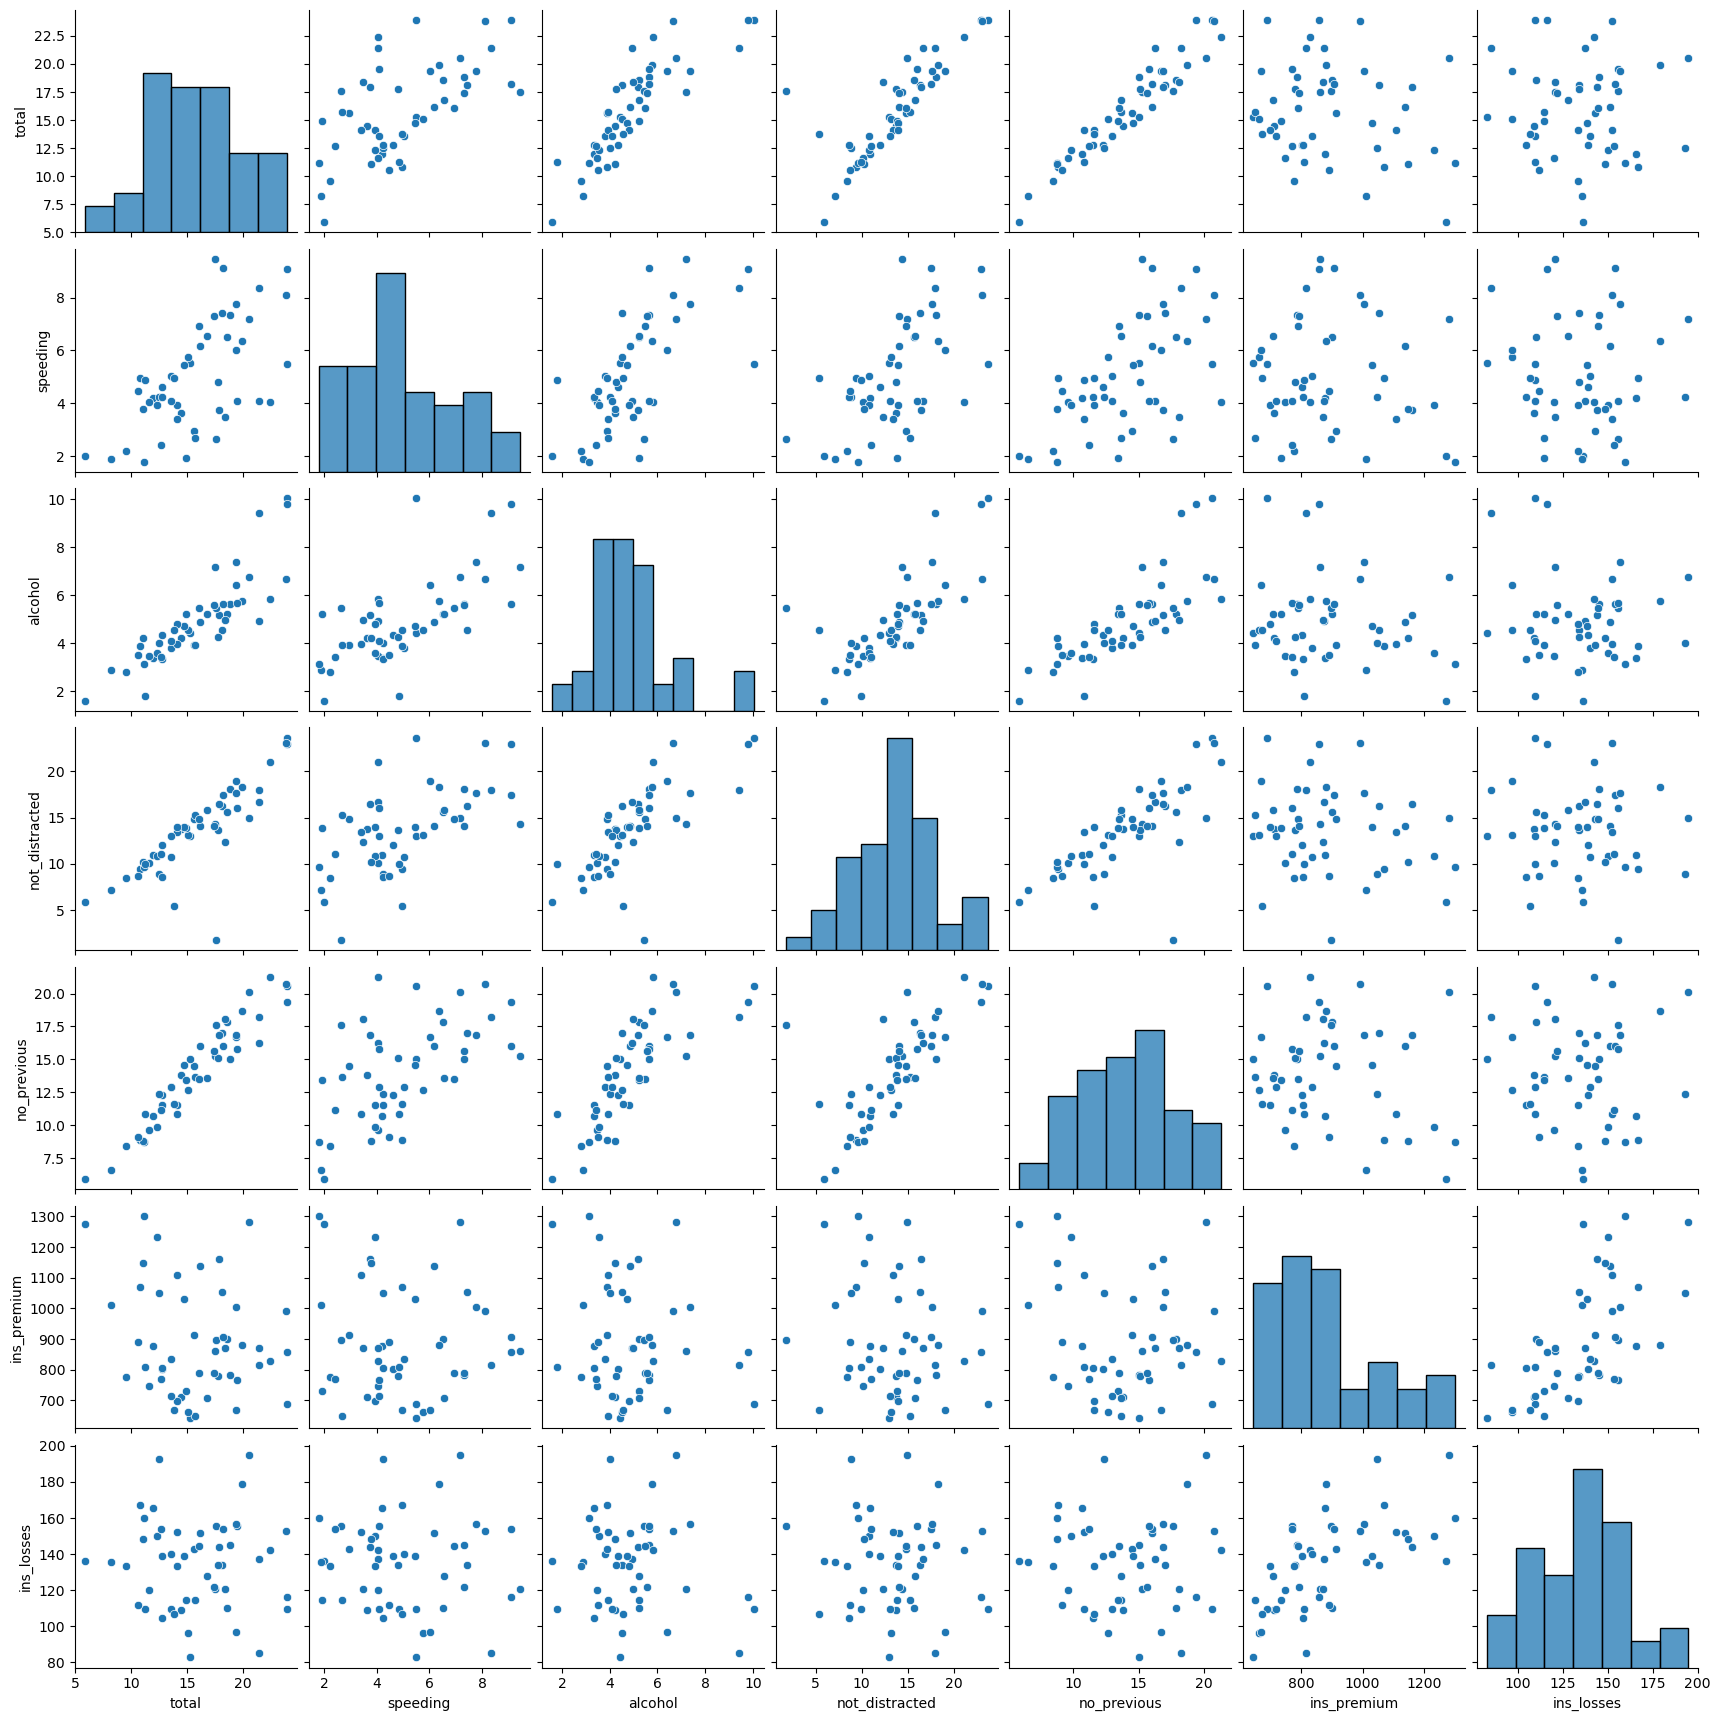

In [37]:
# Pair Plots
sns.pairplot(crash_df)

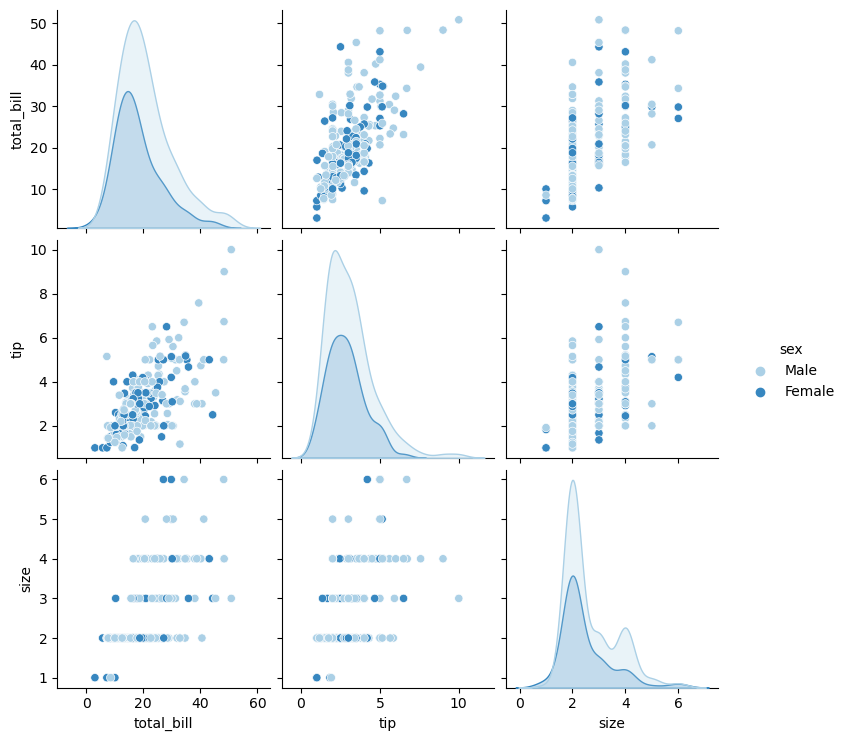

In [38]:
## New data
tips_df = sns.load_dataset('tips')

sns.pairplot(tips_df, hue='sex', palette='Blues')

<Axes: xlabel='tip'>

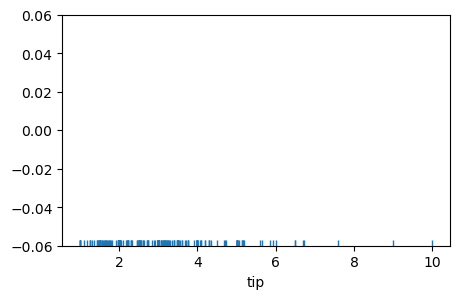

In [47]:
## Rug plot

f, ax = plt.subplots(figsize=(5, 3))
sns.rugplot(tips_df['tip'])

<Figure size 800x400 with 0 Axes>

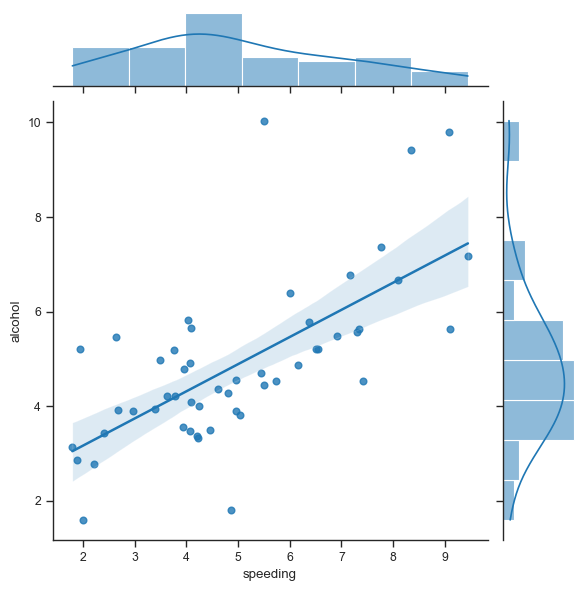

In [59]:
# Styling

sns.set_style('ticks')

plt.figure(figsize=(8, 4))

sns.set_context('paper', font_scale=1) ## talk, paper, poster

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

## Categorical Plots

<Axes: xlabel='sex', ylabel='total_bill'>

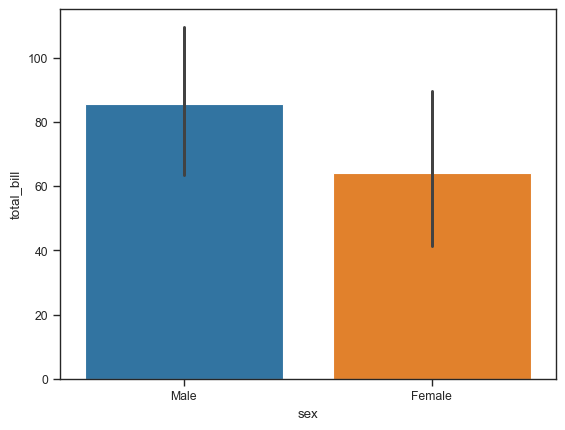

In [63]:
# Bar chart
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.cov)

<Axes: xlabel='sex', ylabel='count'>

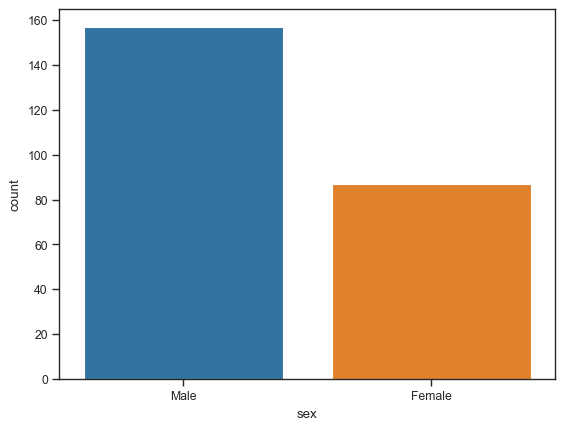

In [64]:
# Count plot
sns.countplot(x='sex', data=tips_df)

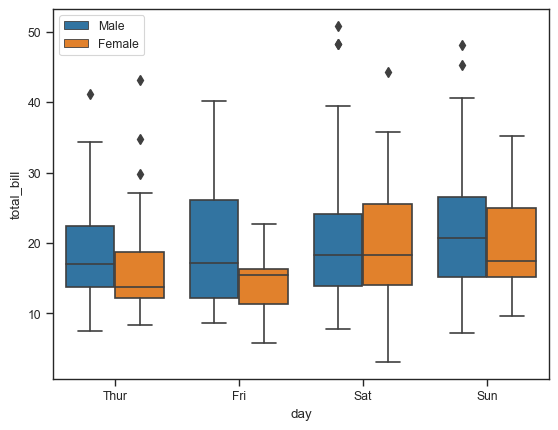

In [69]:
# Box plot
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

<Axes: xlabel='day', ylabel='total_bill'>

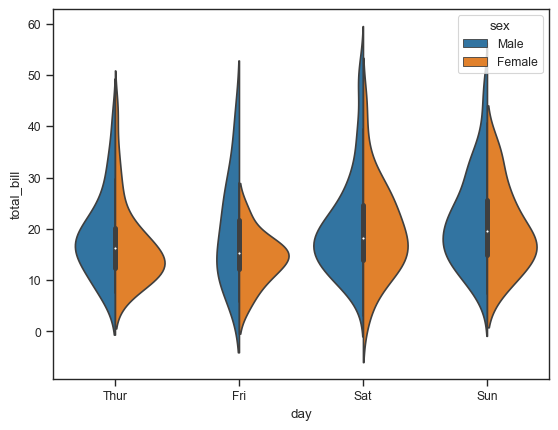

In [71]:
# Violin plot

sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

<Axes: xlabel='day', ylabel='total_bill'>

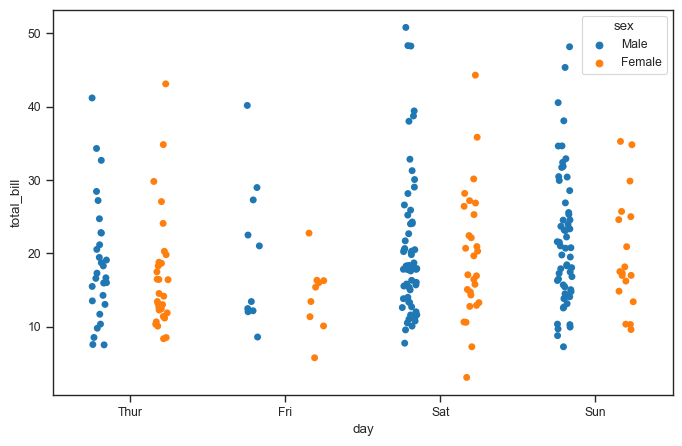

In [75]:
# strip Plot

plt.figure(figsize=(8, 5))

sns.stripplot(x='day', y ='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

<Axes: xlabel='day', ylabel='total_bill'>

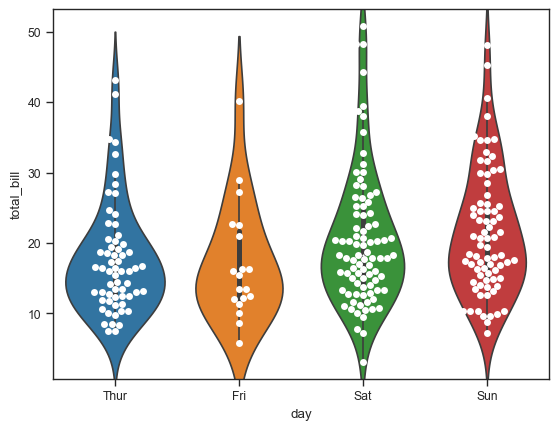

In [79]:
# Swarm plot

sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

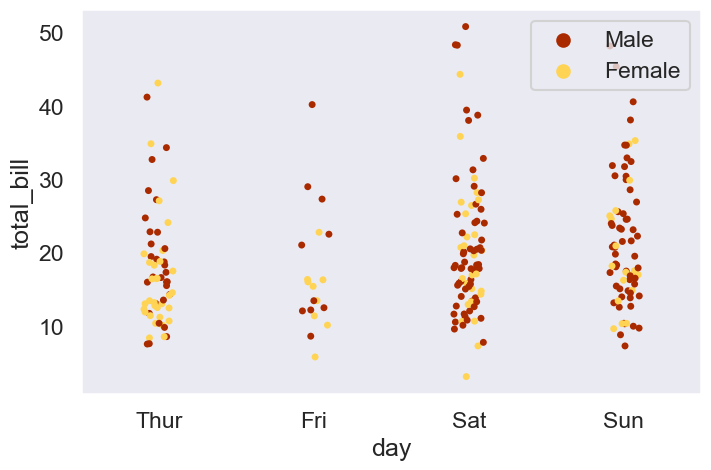

In [84]:
# Color Palettes

plt.figure(figsize=(8, 5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')
plt.legend(loc=1)

## Matrix Plots

C:\Users\Pandiyan\AppData\Local\Temp\ipykernel_16740\1893520239.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crash_mx = crash_df.corr()


<Axes: >

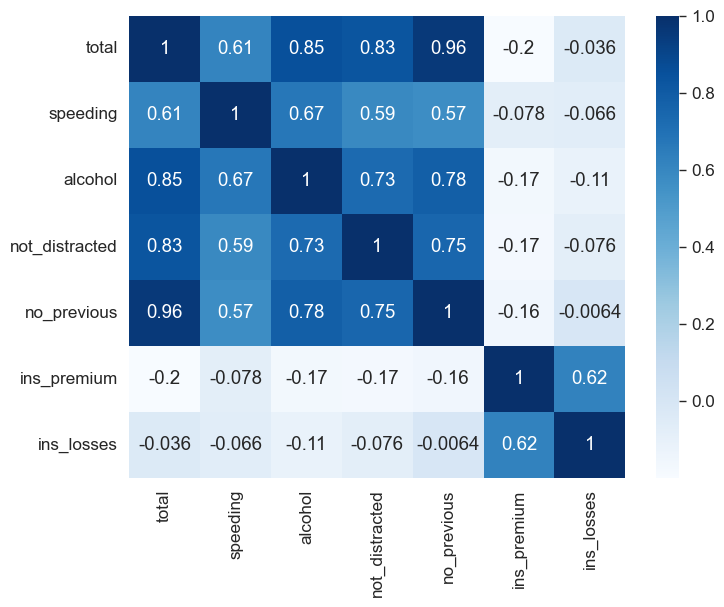

In [89]:
# Heatmaps
plt.figure(figsize=(8, 6))
sns.set_context('paper', font_scale=1.4)

crash_mx = crash_df.corr()

sns.heatmap(crash_mx, annot=True, cmap='Blues')


In [100]:
# New data 
flights = sns.load_dataset('flights')
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [101]:
flights = flights.pivot_table(values='passengers', index='month', columns='year')
flights

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

<Axes: xlabel='year', ylabel='month'>

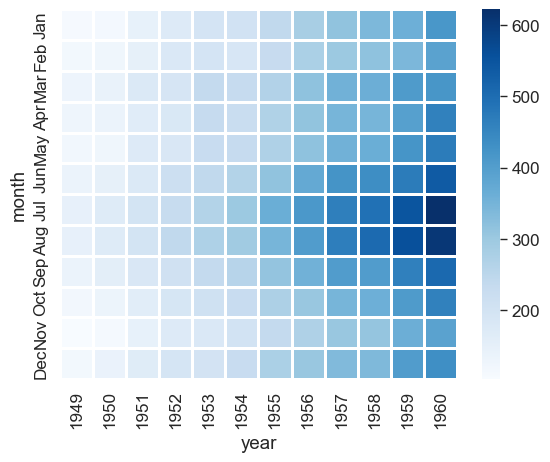

In [112]:
# Heatmaps
sns.heatmap(flights, cmap = 'Blues', linecolor='white', linewidth = 1)

In [124]:
# Cluster Map

iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [125]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

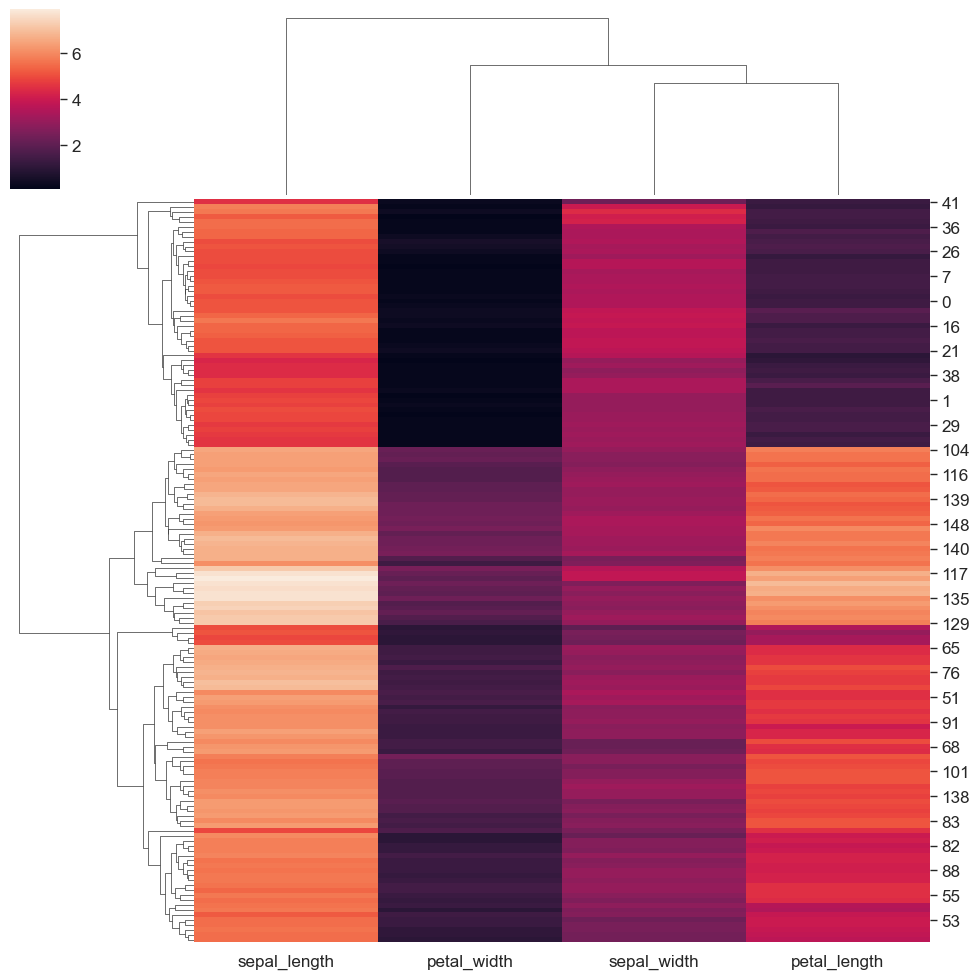

In [126]:
species = iris.pop("species")
sns.clustermap(iris)

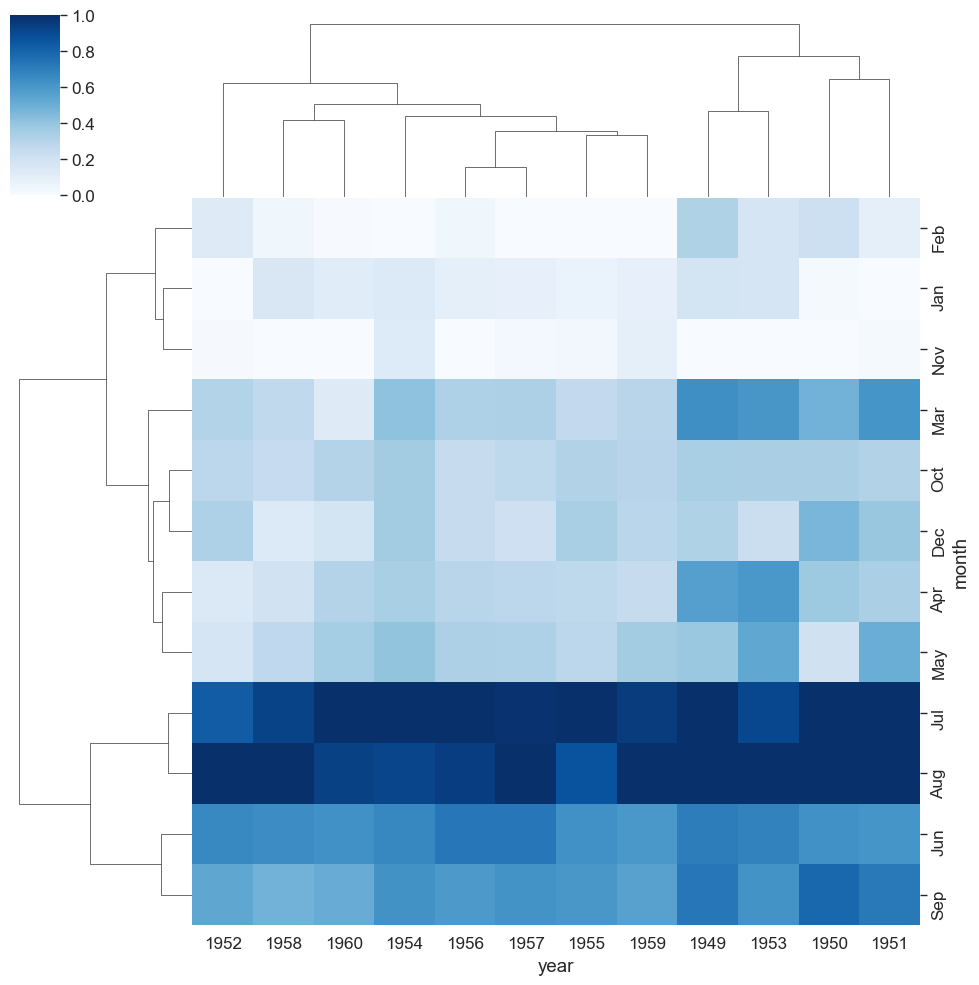

In [127]:
sns.clustermap(flights, cmap='Blues', standard_scale=1)

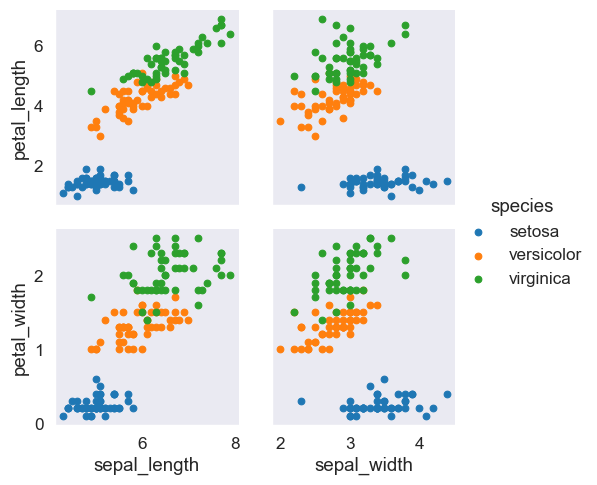

In [134]:
# Pair Grid
iris = sns.load_dataset('iris')
# iris_g = sns.PairGrid(iris, hue= 'species')
# iris_g.map_diag(plt.hist)
# # iris_g.map_offdiag(plt.scatter)
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)
iris_g = sns.PairGrid(iris, hue='species',
                     x_vars = ['sepal_length', 'sepal_width'],
                     y_vars = ['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

In [148]:
tips_df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [147]:
# check docstring this syntax?
sns.FacetGrid?

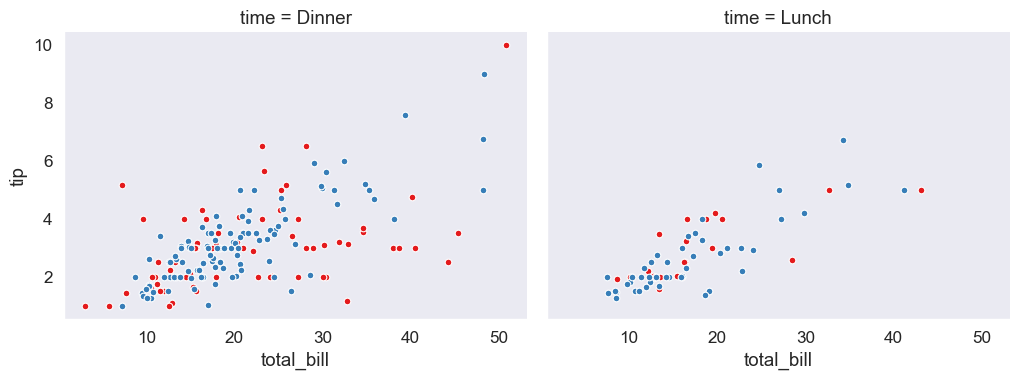

In [146]:
# Facet Grid 
# sns.set_style('dark')
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height =4, aspect=1.3,
                       col_order=['Dinner', 'Lunch'], palette ='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w')

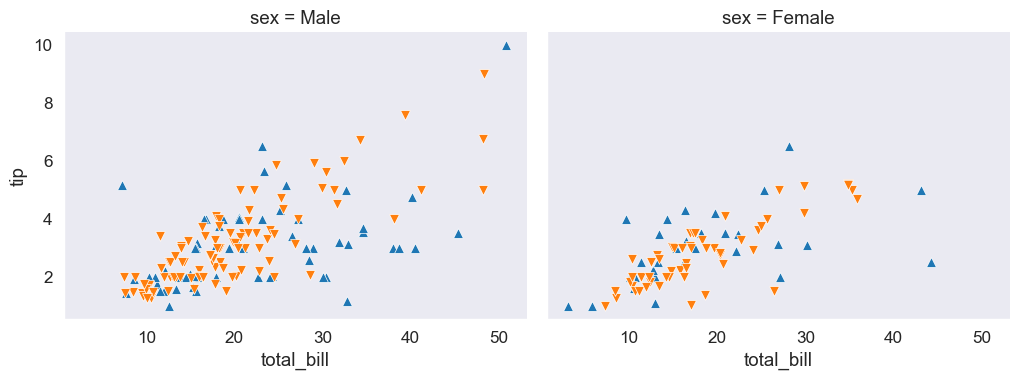

In [149]:
# different symbals
kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col = 'sex',hue='smoker', height=4, aspect=1.3,
                       hue_order=["Yes", 'No'], 
                       hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

In [151]:
# new dataset and same grid different plot
att_df = sns.load_dataset('attention')
att_df.head()

Unnamed: 0  subject attention  solutions  score
0           0        1   divided          1    2.0
1           1        2   divided          1    3.0
2           2        3   divided          1    3.0
3           3        4   divided          1    5.0
4           4        5   divided          1    4.0

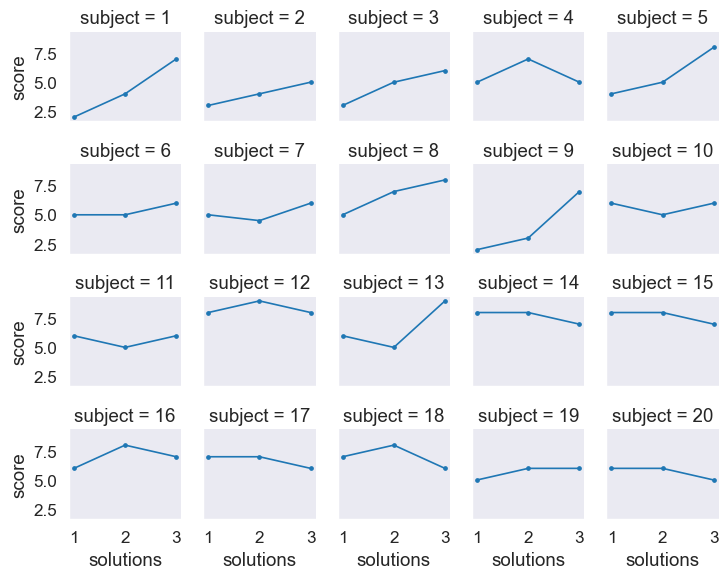

In [153]:
# line plot
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height =1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

## Regression Plots

In [154]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Figure size 800x600 with 0 Axes>

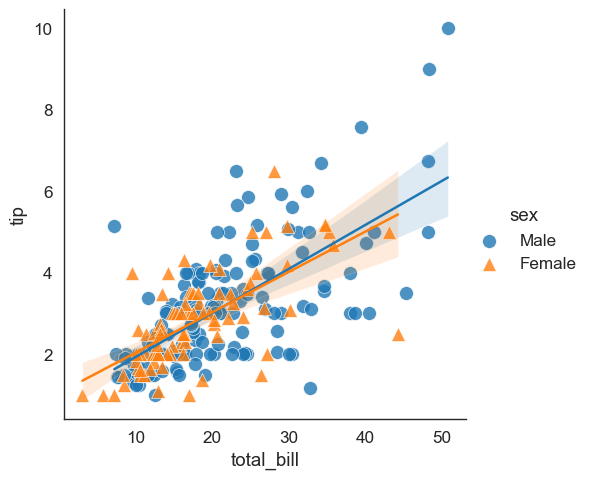

In [161]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o','^'],
          scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor': 'w'})

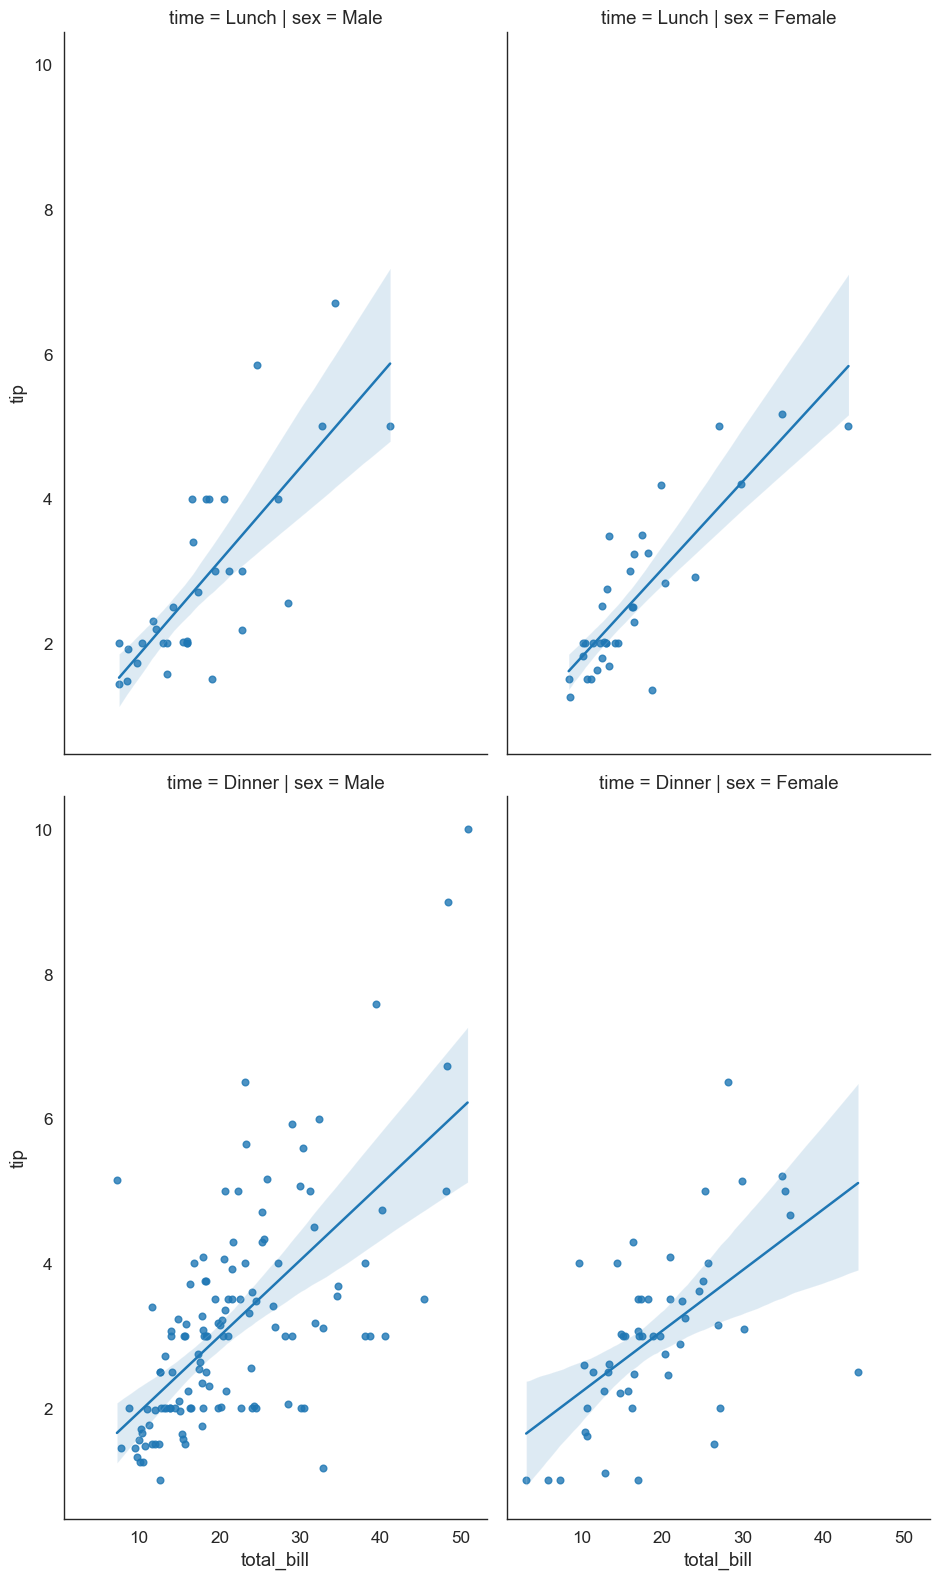

In [169]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df,
          height=8, aspect=0.6)